In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing the Data

In [2]:
df=pd.read_csv("E:\machine learning\HomeWork2\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The Data looks clean and uniform

# EDA

Understanding Our Data

In [3]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
47905

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
11452

neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5

neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['Private room' 'Entire home/apt' 'Shared room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

<AxesSubplot:xlabel='price', ylabel='Count'>

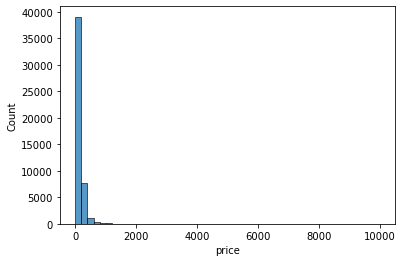

In [4]:
%matplotlib inline
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

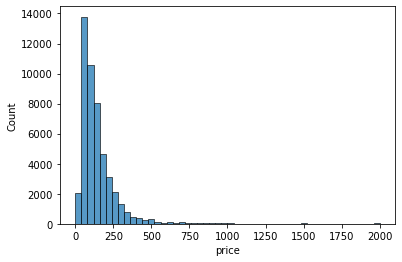

In [5]:
sns.histplot(df.price[df.price<=2000], bins=50)

The price column has a long tail.
So we need to make it better because usually machine learning models doesn't do well with a long tail data.

In [6]:
price_logs = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

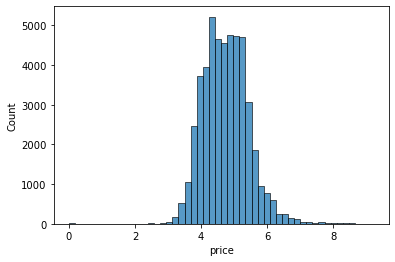

In [7]:
sns.histplot(price_logs, bins=50)

Now, It has an inverse 'U' shape and that's good for our model.

## Main Features of Our Model 

In [8]:
base=['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']
features=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Question 1
### Missing Values

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.reviews_per_month.isnull().sum()

10052

# Question 2
### median of minimum_nights

In [11]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [12]:
df.minimum_nights.median()

3.0

## Splitting The Data

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
n, n_train,n_val, n_test


(48895, 29337, 9779, 9779)

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val   = df.iloc[idx[n_train:n_train+n_val]]
df_test  = df.iloc[idx[n_train+n_val:]]

In [18]:
df_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30


In [19]:
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [20]:
y_train = np.log1p(df_train.price.values)
y_val   = np.log1p(df_val.price.values)
y_test  = np.log1p(df_test.price.values)

In [21]:
del df_train['price']
del df_val['price']
del df_test['price']

In [22]:
df_train_fill0=df_train.copy()
df_train_fill_mean=df_train.copy()

In [23]:
original_mean = df_train['reviews_per_month'].mean()
original_mean

1.3685492094777056

In [24]:
df_train_fill0['reviews_per_month']=df_train_fill0['reviews_per_month'].fillna(0)
mean0 = df_train_fill0['reviews_per_month'].mean()
mean0

1.0887469748099727

In [25]:
df_train_fill_mean['reviews_per_month'] = df_train_fill_mean['reviews_per_month'].fillna(original_mean)
mean_fill_mean = df_train_fill_mean['reviews_per_month'].mean()
mean_fill_mean

1.3685492094777751

In [26]:
X_train_0 = df_train_fill0[features].values
X_train_mean=df_train_fill_mean[features].values

### Training The Model using Linear Regression Model Without Regularization

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
w0_0,w_0=train_linear_regression(X_train_0,y_train)
y_pred_0 = w0_0 + X_train_0.dot(w_0)
w0_0,w_0

(-419.91265866086724,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

Above are the results for filling with 0s

In [29]:
w0_mean,w_mean=train_linear_regression(X_train_mean,y_train)
y_pred_mean=w0_mean+X_train_mean.dot(w_mean)
w0_mean,w_mean

(-423.5393082023219,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563274e-03,  1.32706019e-03,  6.38794182e-04]))

Above are the results for filling with mean value

<AxesSubplot:ylabel='Count'>

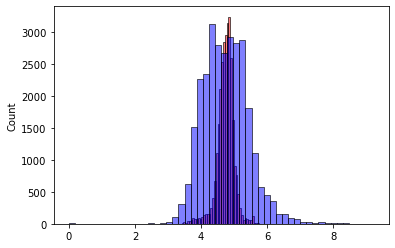

In [30]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<AxesSubplot:ylabel='Count'>

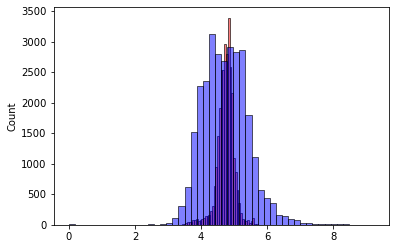

In [31]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

We still need to do some enhancment

### Evaluation using RMSE on Training set

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
r0=rmse(y_train, y_pred_0)
rmean=rmse(y_train, y_pred_mean)
print(round(r0,2))
print(round(rmean,2))
r0

0.64
0.64


0.6428860484860401

## Validating using Val Set

In [34]:
def prepare_X(df):
    df = df.copy()    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rr0=rmse(y_val, y_pred)

In [36]:
y_pred_mean1=w0_mean+X_val.dot(w_mean)
rrmean=rmse(y_val, y_pred_mean1)

In [37]:
print(round(rr0,2))
print(round(rrmean,2))

0.64
0.64


The RMSE Valuse are approx. the same.

# Question 4
### Training our model using Linear Regression with Reqularization & Filling with 0

In [38]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [39]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    print(' r = {}, w0 = {}, RMSE value = {}'.format(r,w0,score))
    

 r = 0, w0 = -419.91265866086724, RMSE value = 0.64
 r = 1e-06, w0 = -419.86271584310543, RMSE value = 0.64
 r = 0.0001, w0 = -414.9764926433289, RMSE value = 0.64
 r = 0.001, w0 = -375.27365274892543, RMSE value = 0.64
 r = 0.01, w0 = -191.7838405478213, RMSE value = 0.66
 r = 0.1, w0 = -32.562560550033176, RMSE value = 0.68
 r = 1, w0 = -3.499216833574792, RMSE value = 0.68
 r = 5, w0 = -0.7033623186161135, RMSE value = 0.68
 r = 10, w0 = -0.35127676047352, RMSE value = 0.68


r=0 is the best because there is no similar columns so we don't need Reqularization

# Question 5
### Trying different seed values

In [40]:
scores=[]
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val   = df.iloc[idx[n_train:n_train+n_val]]
    df_test  = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)


    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)


    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))
    
print (scores)


[0.6549779961545402, 0.6462523685884172, 0.6476558177554858, 0.6375145069192687, 0.6445809082722467, 0.630580999658293, 0.6297851917613978, 0.6506184266611098, 0.6489780353489043, 0.6437565168224396]


In [41]:
std=np.std(scores)
std.round(3)

0.008

# Question 6
### Complete Model using seed 9 and r=0.001 and compining train&validating set

In [42]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)


df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)


w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
resultant = rmse(y_test, y_pred)
resultant


0.6452771348581781

## Simple Feature Engineering (Adding Categorical Variables)

In [43]:
def prepare_new_X(df):
    
    df = df.copy()
    features1= base.copy()
    
    for v in ['Private room', 'Entire home/apt', 'Shared room']:
        df['room_type_%s' % v] = (df.room_type == v).astype(int)
        features1.append('room_type_%s' % v)
    
    df_num = df[features1]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [44]:
X_train_new = prepare_new_X(df_train)
w0, w = train_linear_regression_reg(X_train_new, y_train, r=0.001)

X_val_new = prepare_new_X(df_val)
y_pred = w0 + X_val_new.dot(w)
rmse(y_val, y_pred)

0.5081700620844719

### So here is the final model after adding Categorical Variables and using Linear_Regression_Regilarization

RMSE value is 0.5 with Categorical Variables.<br>
RMSE value is 0.64 without Categorical Variables  

In [45]:
X_train_new1 = prepare_new_X(df_full_train)
w0, w = train_linear_regression_reg(X_train_new1, y_full_train, r=0.001)

X_test_new = prepare_new_X(df_test)
y_pred = w0 + X_test_new.dot(w)
rmse(y_test, y_pred)

0.5069276592721422

### This is the final model after training 80% of the data

# Using Our Model

In [46]:
house = df_test.iloc[20].to_dict()
house

{'id': 33635511,
 'name': 'Hamilton Heights Home Away from Home! (30-Day Min)',
 'host_id': 23777742,
 'host_name': 'Eliot',
 'neighbourhood_group': 'Manhattan',
 'neighbourhood': 'Harlem',
 'latitude': 40.82479,
 'longitude': -73.94218,
 'room_type': 'Entire home/apt',
 'minimum_nights': 30,
 'number_of_reviews': 0,
 'last_review': nan,
 'reviews_per_month': nan,
 'calculated_host_listings_count': 1,
 'availability_365': 242}

In [47]:
df_small = pd.DataFrame([house])
df_small

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,33635511,Hamilton Heights Home Away from Home! (30-Day ...,23777742,Eliot,Manhattan,Harlem,40.82479,-73.94218,Entire home/apt,30,0,NaN,NaN,1,242


That is like someone wanna know the price of a house with certain features and it comes to us in (dictionary format) now we will use our model to predict the price

In [48]:
X_small = prepare_new_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

5.2746449795340595

In [49]:
y_test[20]

4.836281906951478

So the difference is about 400$.